In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
paultimothymooney_chest_xray_pneumonia_path = kagglehub.dataset_download('paultimothymooney/chest-xray-pneumonia')

print('Data source import complete.')

In [ ]:

import numpy as np
import pandas as pd

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
!pip install matplotlib seaborn tensorflow keras scikit-learn opencv-python

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import cv2
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

train_dir = "/content/drive/MyDrive/pneumoniaimages/xray/train"
if not os.path.exists(train_dir):
    print(f"Directory '{train_dir}' does not exist. Check the path.")
else:
    print(f"Directory exists. Contents: {os.listdir(train_dir)}")

# Check for the PNEUMONIA folder
pneumonia_dir = os.path.join(train_dir, "PNEUMONIA")
if not os.path.exists(pneumonia_dir):
    print(f"Subdirectory '{pneumonia_dir}' does not exist. Verify the dataset structure.")
else:
    print(f"Subdirectory '{pneumonia_dir}' exists. Contents: {os.listdir(pneumonia_dir)}")


Directory exists. Contents: ['Pneumonia', 'Normal']
Subdirectory '/content/drive/MyDrive/pneumoniaimages/xray/train/PNEUMONIA' does not exist. Verify the dataset structure.


In [ ]:
import os

test_dir = "/content/drive/MyDrive/pneumoniaimages/xray/test"
if not os.path.exists(test_dir):
    print(f"Directory '{test_dir}' does not exist. Check the path.")
else:
    print(f"Directory exists. Contents: {os.listdir(test_dir)}")

# Check for the PNEUMONIA folder
pneumonia_dir = os.path.join(test_dir, "PNEUMONIA")
if not os.path.exists(pneumonia_dir):
    print(f"Subdirectory '{pneumonia_dir}' does not exist. Verify the dataset structure.")
else:
    print(f"Subdirectory '{pneumonia_dir}' exists. Contents: {os.listdir(pneumonia_dir)}")

Directory exists. Contents: ['Normal', 'Pneumonia']
Subdirectory '/content/drive/MyDrive/pneumoniaimages/xray/test/PNEUMONIA' does not exist. Verify the dataset structure.


In [ ]:
import os

val_dir = "/content/drive/MyDrive/pneumoniaimages/xray/val"
if not os.path.exists(val_dir):
    print(f"Directory '{val_dir}' does not exist. Check the path.")
else:
    print(f"Directory exists. Contents: {os.listdir(val_dir)}")

# Check for the PNEUMONIA folder
pneumonia_dir = os.path.join(val_dir, "PNEUMONIA")
if not os.path.exists(pneumonia_dir):
    print(f"Subdirectory '{pneumonia_dir}' does not exist. Verify the dataset structure.")
else:
    print(f"Subdirectory '{pneumonia_dir}' exists. Contents: {os.listdir(pneumonia_dir)}")

Directory exists. Contents: ['Pneumonia', 'Normal']
Subdirectory '/content/drive/MyDrive/pneumoniaimages/xray/val/PNEUMONIA' does not exist. Verify the dataset structure.


In [ ]:
train = get_training_data("/content/drive/MyDrive/pneumoniaimages/xray/train")
test = get_training_data("/content/drive/MyDrive/pneumoniaimages/xray/test")
val = get_training_data("/content/drive/MyDrive/pneumoniaimages/xray/val")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/pneumoniaimages/xray/train/PNEUMONIA'

In [ ]:
import os

# Check the test directory and its contents
test_dir = "/content/drive/MyDrive/pneumoniaimages/xray/test"
print("Test Directory Exists:", os.path.exists(test_dir))
print("Subdirectories in Test:", os.listdir(test_dir) if os.path.exists(test_dir) else "Directory does not exist")


Test Directory Exists: True
Subdirectories in Test: ['Normal', 'Pneumonia']


In [ ]:
l = []
for i in train_dir:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)

IndexError: string index out of range

<Axes: ylabel='count'>

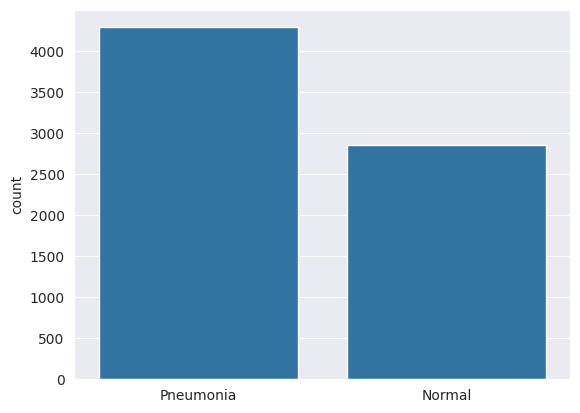

In [ ]:
import os
import seaborn as sns

# Directory containing your images
train_dir = "/content/drive/MyDrive/pneumoniaimages/xray/train"

# Generate labels based on subdirectory names
l = []
for label in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, label)
    if os.path.isdir(folder_path):  # Ensure it's a folder
        num_images = len(os.listdir(folder_path))  # Count images
        if label.lower() == "pneumonia":
            l.extend(["Pneumonia"] * num_images)  # Add "Pneumonia" for each image
        elif label.lower() == "normal":
            l.extend(["Normal"] * num_images)  # Add "Normal" for each image

# Plot the distribution of labels
sns.set_style('darkgrid')
sns.countplot(x=l)

<Axes: ylabel='count'>

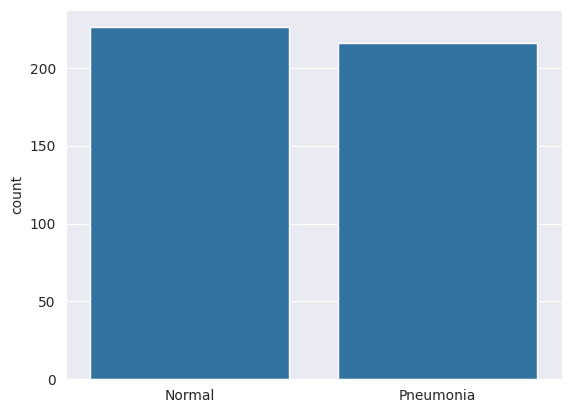

In [ ]:
import os
import seaborn as sns

# Directory containing your images
test_dir = "/content/drive/MyDrive/pneumoniaimages/xray/test"

# Generate labels based on subdirectory names
l = []
for label in os.listdir(test_dir):
    folder_path = os.path.join(test_dir, label)
    if os.path.isdir(folder_path):  # Ensure it's a folder
        num_images = len(os.listdir(folder_path))  # Count images
        if label.lower() == "pneumonia":
            l.extend(["Pneumonia"] * num_images)  # Add "Pneumonia" for each image
        elif label.lower() == "normal":
            l.extend(["Normal"] * num_images)  # Add "Normal" for each image

# Plot the distribution of labels
sns.set_style('darkgrid')
sns.countplot(x=l)

<Axes: ylabel='count'>

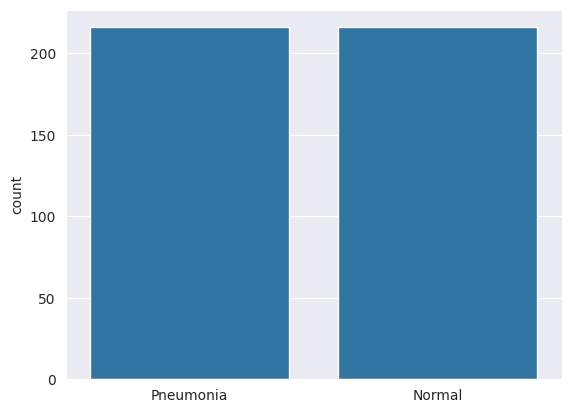

In [ ]:
import os
import seaborn as sns

# Directory containing your images
val_dir = "/content/drive/MyDrive/pneumoniaimages/xray/val"

# Generate labels based on subdirectory names
l = []
for label in os.listdir(val_dir):
    folder_path = os.path.join(val_dir, label)
    if os.path.isdir(folder_path):  # Ensure it's a folder
        num_images = len(os.listdir(folder_path))  # Count images
        if label.lower() == "pneumonia":
            l.extend(["Pneumonia"] * num_images)  # Add "Pneumonia" for each image
        elif label.lower() == "normal":
            l.extend(["Normal"] * num_images)  # Add "Normal" for each image

# Plot the distribution of labels
sns.set_style('darkgrid')
sns.countplot(x=l)

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Directory containing your images
train_dir = "/content/drive/MyDrive/pneumoniaimages/xray/train"

# Load images and labels
train = []
labels = {"PNEUMONIA": 1, "NORMAL": 0}

# Check if the directory exists
if not os.path.exists(train_dir):
    print(f"Error: Directory '{train_dir}' does not exist!")
else:
    print(f"Found directory: {train_dir}")

# Load images
for label, class_num in labels.items():
    folder_path = os.path.join(train_dir, label)
    if not os.path.exists(folder_path):
        print(f"Warning: Subdirectory '{folder_path}' does not exist. Skipping.")
        continue
    print(f"Processing images in: {folder_path}")
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if img is not None:
            train.append((img, class_num))  # Append (image, label)
        else:
            print(f"Failed to read image: {img_path}")

# Check if any images were loaded
if len(train) == 0:
    print("Error: No images were loaded. Check the dataset structure.")
else:
    print(f"Successfully loaded {len(train)} images.")

# Map numerical labels to string labels
label_names = {1: "Pneumonia", 0: "Normal"}

# Visualize the first and last images if train is not empty
if train:
    plt.figure(figsize=(5, 5))
    plt.imshow(train[0][0], cmap='gray')
    plt.title(label_names[train[0][1]])
    plt.axis('off')  # Hide axes

    plt.figure(figsize=(5, 5))
    plt.imshow(train[-1][0], cmap='gray')
    plt.title(label_names[train[-1][1]])
    plt.axis('off')  # Hide axes

    plt.show()


Found directory: /content/drive/MyDrive/pneumoniaimages/xray/train
Error: No images were loaded. Check the dataset structure.


In [ ]:
import os

for root, dirs, files in os.walk(train_dir):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)
    import os
import cv2
import matplotlib.pyplot as plt

# Directory containing your images
train_dir = "/content/drive/MyDrive/pneumoniaimages/xray/train"

# Load images and labels
train = []
labels = {"PNEUMONIA": 1, "NORMAL": 0}

# Check if the directory exists
if not os.path.exists(train_dir):
    print(f"Error: Directory '{train_dir}' does not exist!")
else:
    print(f"Found directory: {train_dir}")

# Load images
for label, class_num in labels.items():
    folder_path = os.path.join(train_dir, label)
    if not os.path.exists(folder_path):
        print(f"Warning: Subdirectory '{folder_path}' does not exist. Skipping.")
        continue
    print(f"Processing images in: {folder_path}")
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if img is not None:
            train.append((img, class_num))  # Append (image, label)
        else:
            print(f"Failed to read image: {img_path}")

# Check if any images were loaded
if len(train) == 0:
    print("Error: No images were loaded. Check the dataset structure.")
else:
    print(f"Successfully loaded {len(train)} images.")

# Map numerical labels to string labels
label_names = {1: "Pneumonia", 0: "Normal"}

# Visualize the first and last images if train is not empty
if train:
    plt.figure(figsize=(5, 5))
    plt.imshow(train[0][0], cmap='gray')
    plt.title(label_names[train[0][1]])
    plt.axis('off')  # Hide axes

    plt.figure(figsize=(5, 5))
    plt.imshow(train[-1][0], cmap='gray')
    plt.title(label_names[train[-1][1]])
    plt.axis('off')  # Hide axes

    plt.show()



Root: /content/drive/MyDrive/pneumoniaimages/xray/train
Directories: ['Pneumonia', 'Normal']
Files: []
----------------------------------------
Root: /content/drive/MyDrive/pneumoniaimages/xray/train/Pneumonia
Directories: []
Files: ['Pneumonia-Viral (1573).jpg', 'Pneumonia-Viral (1595).jpg', 'Pneumonia-Viral (1569).jpg', 'Pneumonia-Viral (1600).jpg', 'Pneumonia-Viral (1574).jpg', 'Pneumonia-Viral (1597).jpg', 'Pneumonia-Viral (1581).jpg', 'Pneumonia-Viral (160).jpg', 'Pneumonia-Viral (1585).jpg', 'Pneumonia-Viral (1575).jpg', 'Pneumonia-Viral (1576).jpg', 'Pneumonia-Viral (1580).jpg', 'Pneumonia-Viral (1571).jpg', 'Pneumonia-Viral (1572).jpg', 'Pneumonia-Viral (1633).jpg', 'Pneumonia-Viral (1614).jpg', 'Pneumonia-Viral (1605).jpg', 'Pneumonia-Viral (163).jpg', 'Pneumonia-Viral (1609).jpg', 'Pneumonia-Viral (161).jpg', 'Pneumonia-Viral (1604).jpg', 'Pneumonia-Viral (1601).jpg', 'Pneumonia-Viral (1615).jpg', 'Pneumonia-Viral (1603).jpg', 'Pneumonia-Viral (1607).jpg', 'Pneumonia-Viral (1

Found 7143 files belonging to 2 classes.
Class names: ['Normal', 'Pneumonia']


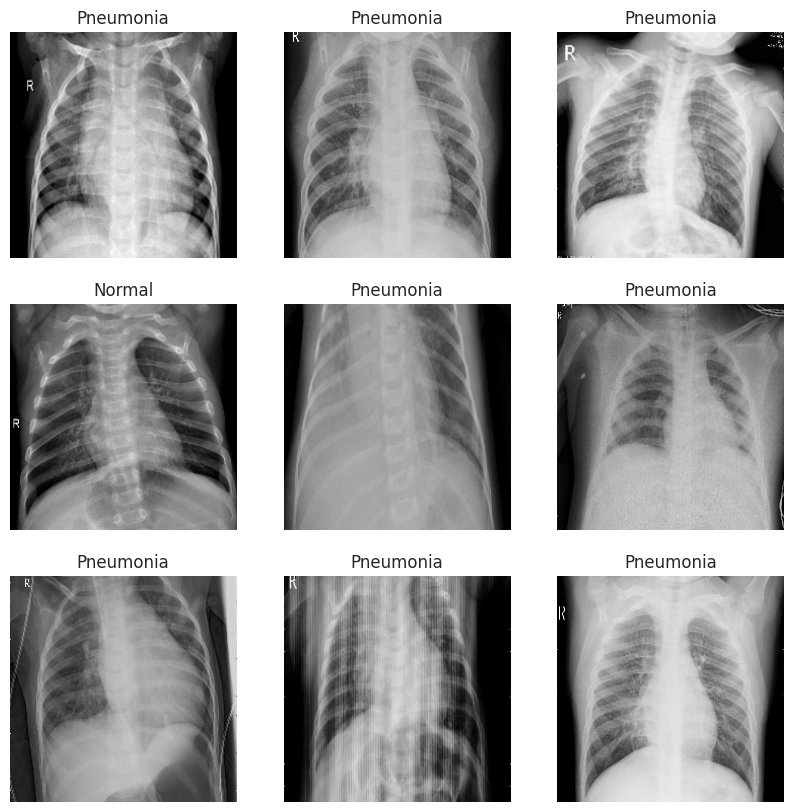

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/pneumoniaimages/xray/train'

# Create the dataset
try:
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        dataset_path,
        image_size=(224, 224),  # Resize images to a uniform size
        batch_size=32,         # Batch size
        shuffle=True           # Shuffle the data
    )
except Exception as e:
    print(f"Error loading dataset: {e}")

# Get class names
class_names = train_dataset.class_names
print(f"Class names: {class_names}")

# Visualize some images
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):  # Take a single batch
    for i in range(9):  # Show 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
train = [([1, 2], 0), ([3, 4], 1)]  # Features and labels for training
test = [([5, 6], 0)]               # Features and labels for testing
val = [([7, 8], 1)]                # Features and labels for validation


In [ ]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
# resize data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

ValueError: cannot reshape array of size 4 into shape (150,150,1)

In [ ]:
print(f"x_train shape before reshaping: {np.array(x_train).shape}")


x_train shape before reshaping: (2, 2)


In [ ]:
x_train = np.array(x_train)


In [ ]:
for i, feature in enumerate(x_train):
    print(f"Feature {i} shape: {np.array(feature).shape}")


Feature 0 shape: (2,)
Feature 1 shape: (2,)


In [ ]:
import cv2
x_train = [cv2.resize(feature, (img_size, img_size)) for feature in x_train]
x_train = np.array(x_train).reshape(-1, img_size, img_size, 1)


In [ ]:
# Ensure x_train has the right number of elements
x_train = x_train.reshape(len(x_train), img_size, img_size, 1)


In [ ]:
import numpy as np
import cv2

# Example data (replace with your actual data)
x_train = [np.random.rand(200, 200) for _ in range(10)]  # Replace 200 with actual size if necessary
y_train = [0, 1, 0, 1, 1, 0, 1, 0, 1, 0]

x_val = [np.random.rand(200, 200) for _ in range(3)]
y_val = [1, 0, 1]

x_test = [np.random.rand(200, 200) for _ in range(2)]
y_test = [0, 1]

# Desired image size
img_size = 150

# Resize and reshape
x_train = np.array([cv2.resize(img, (img_size, img_size)) for img in x_train]).reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = np.array([cv2.resize(img, (img_size, img_size)) for img in x_val]).reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = np.array([cv2.resize(img, (img_size, img_size)) for img in x_test]).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# Verify shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (10, 150, 150, 1)
y_train shape: (10,)
x_val shape: (3, 150, 150, 1)
y_val shape: (3,)
x_test shape: (2, 150, 150, 1)
y_test shape: (2,)


In [ ]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 38, 38, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 38, 38, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 19, 19, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 19, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 19, 19, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │              

 Total params: 1,246,401 (4.75 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8000 - loss: 0.5229 - val_accuracy: 0.6667 - val_loss: 0.6413 - learning_rate: 0.0010
Epoch 2/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step - accuracy: 0.5000 - loss: 13.6823 - val_accuracy: 0.3333 - val_loss: 0.8541 - learning_rate: 0.0010
Epoch 3/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 0.5000 - loss: 32.9317
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step - accuracy: 0.5000 - loss: 32.9317 - val_accuracy: 0.6667 - val_loss: 0.6855 - learning_rate: 0.0010
Epoch 4/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 6.1712 - val_accuracy: 0.6667 - val_loss: 0.6729 - learning_rate: 3.0000e-04
Epoch 5/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6000 - loss: 2.1453
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6000 - loss: 2.1453 - val_accuracy: 0.6667 - val_loss:

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.7787
Loss of the model is -  0.7786552906036377
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5000 - loss: 0.7787
Accuracy of the model is -  50.0 %


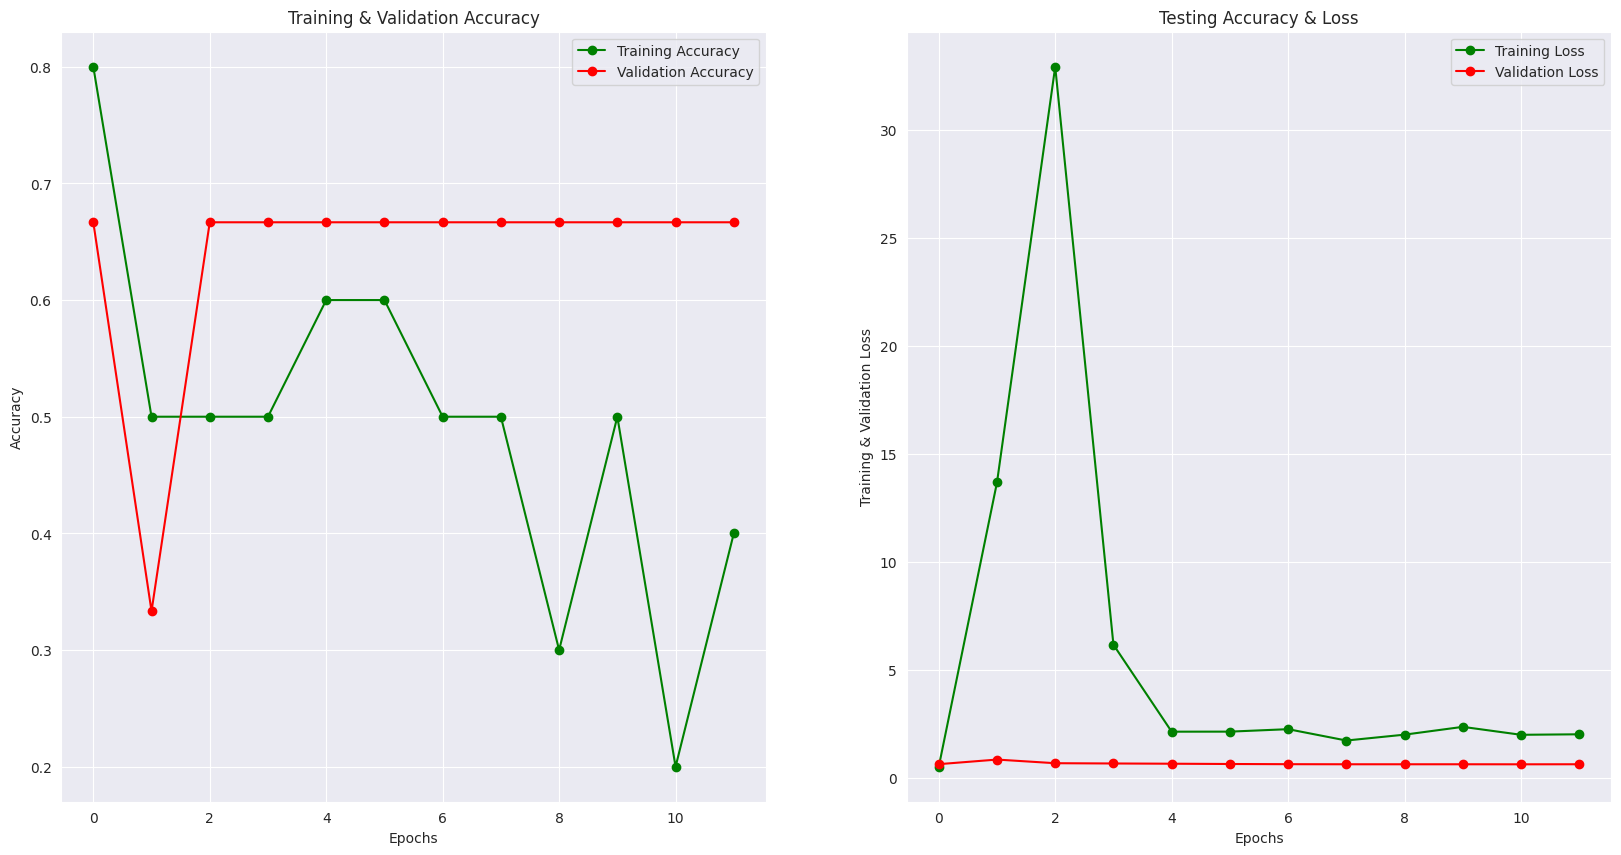

In [ ]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
# Use model.predict() to get raw predictions (logits or probabilities)
predictions = model.predict(x_test)

# Convert predictions to class indices
predictions = np.argmax(predictions, axis=1)

# Reshape is not needed in this case
print("First 15 predictions:", predictions[:15])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
First 15 predictions: [0 0]


In [ ]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))





NameError: name 'classification_report' is not defined

In [ ]:
cm = confusion_matrix(y_test,predictions)
cm

array([[1, 0],
       [1, 0]])

In [ ]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<Axes: >

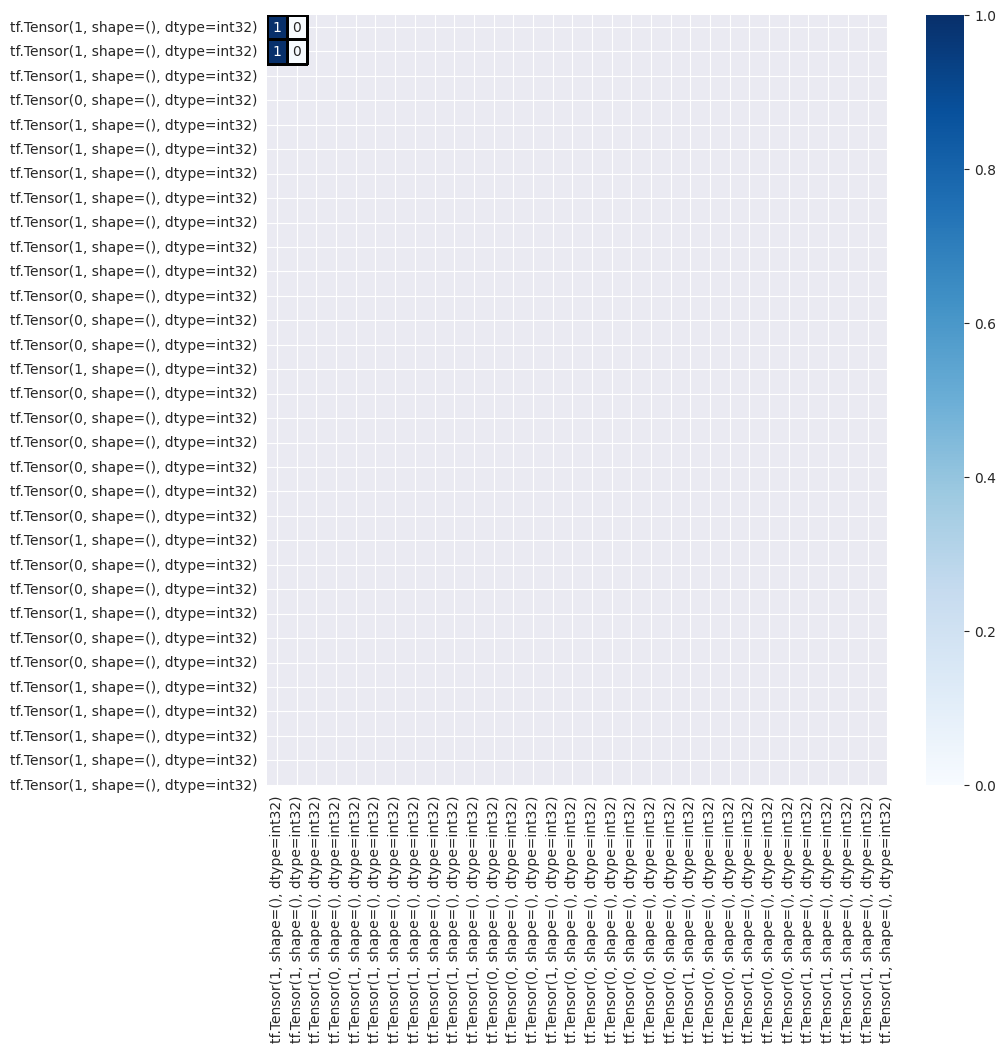

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

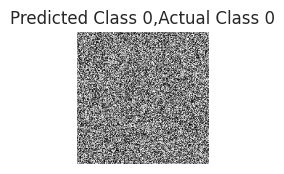

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1